In [1]:
# Crime Data Analysis project. Orem Utah incident reports for 2015.
# dataset --> https://opendata.utah.gov/Public-Safety/Orem-City-Police-Crime-Data/52dt-95n9/data_preview

In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# upload orem_crime_data csv
df = pd.read_csv(r"C:\Users\mcsan\OneDrive\Desktop\data analytics projects\orem_crime_data.csv")

In [4]:
## 1) review raw data

In [5]:
df.head(5)

,Unnamed Column,address_1,case_number,city,clearance_type,country,created_at,day_of_week,hour_of_day,incident_datetime,incident_description,incident_id,incident_type_primary,latitude,location,longitude,parent_incident_type,state,updated_at,zip
0,8848,400 Block OREM BLVD,15OR29573,OREM,NaN,NaN,07/12/2015 08:04:40 AM,Thursday,20,07/09/2015 08:07:51 PM,Description: Alarm,723750126,ALARM,40.2889,"{'type': 'Point', 'coordinates': [-111.694, 40...",-111.694,Alarm,UT,07/22/2015 08:16:20 AM,NaN
1,1261,1700 Block STATE ST,16OR22903,OREM,NaN,NaN,05/17/2016 05:45:35 AM,Saturday,16,05/14/2016 04:05:15 PM,Description: Alarm,759697840,ALARM,40.3301,"{'type': 'Point', 'coordinates': [-111.711, 40...",-111.711,Alarm,UT,07/11/2016 03:48:45 PM,NaN
2,1932,1 Block PALISADE DR,15OR03209,OREM,NaN,NaN,02/04/2015 09:04:22 AM,Saturday,11,01/24/2015 11:01:54 AM,Description: Alarm,682818094,ALARM,40.2982,"{'type': 'Point', 'coordinates': [-111.669, 40...",-111.669,Alarm,UT,02/05/2015 09:03:57 AM,NaN
3,2041,800 Block STATE ST,15OR03614,OREM,NaN,NaN,02/04/2015 09:04:24 AM,Tuesday,13,01/27/2015 01:01:20 PM,Description: Fraud,682818233,FRAUD,40.2815,"{'type': 'Point', 'coordinates': [-111.688, 40...",-111.688,Theft,UT,02/05/2015 09:03:48 AM,NaN
4,5118,1900 Block MAIN ST,15OR11840,OREM,NaN,NaN,03/24/2015 09:09:09 AM,Saturday,17,03/21/2015 05:03:32 PM,Description: Alarm,710686523,ALARM,40.2624,"{'type': 'Point', 'coordinates': [-111.695, 40...",-111.695,Alarm,UT,04/01/2015 09:16:32 AM,NaN


In [6]:
df.dtypes

Unnamed Column             int64
address_1                 object
case_number               object
city                      object
clearance_type           float64
country                   object
created_at                object
day_of_week               object
hour_of_day                int64
incident_datetime         object
incident_description      object
incident_id                int64
incident_type_primary     object
latitude                 float64
location                  object
longitude                float64
parent_incident_type      object
state                     object
updated_at                object
zip                      float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed Column         15000 non-null  int64  
 1   address_1              15000 non-null  object 
 2   case_number            15000 non-null  object 
 3   city                   15000 non-null  object 
 4   clearance_type         0 non-null      float64
 5   country                116 non-null    object 
 6   created_at             15000 non-null  object 
 7   day_of_week            15000 non-null  object 
 8   hour_of_day            15000 non-null  int64  
 9   incident_datetime      15000 non-null  object 
 10  incident_description   15000 non-null  object 
 11  incident_id            15000 non-null  int64  
 12  incident_type_primary  15000 non-null  object 
 13  latitude               15000 non-null  float64
 14  location               15000 non-null  object 
 15  lo

In [8]:
# find columns that have missing values.
df.isnull().sum()

Unnamed Column               0
address_1                    0
case_number                  0
city                         0
clearance_type           15000
country                  14884
created_at                   0
day_of_week                  0
hour_of_day                  0
incident_datetime            0
incident_description         0
incident_id                  0
incident_type_primary        0
latitude                     0
location                     0
longitude                    0
parent_incident_type         0
state                        0
updated_at                   0
zip                      14999
dtype: int64

In [9]:
# how many unique values are in each column. 
df.nunique()

Unnamed Column           15000
address_1                 2434
case_number              15000
city                        14
clearance_type               0
country                      1
created_at                1106
day_of_week                  7
hour_of_day                 24
incident_datetime        14280
incident_description       140
incident_id              15000
incident_type_primary      116
latitude                   925
location                  4615
longitude                  256
parent_incident_type        23
state                        1
updated_at                4962
zip                          1
dtype: int64

In [14]:
# list out unique cities
cities = sorted(df['city'].unique().tolist())
cities

['AMERICAN FORK',
 'CEDAR HILLS',
 'LEHI',
 'LINDON',
 'OREM',
 'Orem',
 'PAYSON',
 'PLEASANT GROVE',
 'PROVO',
 'SPANISH FORK',
 'SPRINGVILLE',
 'UTAH COUNTY',
 'UTAH VALLEY U',
 'VINEYARD']

In [15]:
# view data for cities in city_list.
city_list = ['UTAH VALLEY U', 'UTAH COUNTY', 'Orem']
df[df['city'].isin(city_list)]

,Unnamed Column,address_1,case_number,city,clearance_type,country,created_at,day_of_week,hour_of_day,incident_datetime,incident_description,incident_id,incident_type_primary,latitude,location,longitude,parent_incident_type,state,updated_at,zip
659,653,UVL13,14OR53663,UTAH VALLEY U,NaN,NaN,01/01/2015 09:03:38 AM,Monday,17,12/29/2014 05:12:01 PM,Description: Citizen Assist,649919850,CITIZEN ASSIST,40.2801,"{'type': 'Point', 'coordinates': [-111.716, 40...",-111.7160,Community Policing,UT,01/10/2015 09:01:30 AM,NaN
2687,2682,1800 Block GENEVA RD,15OR06021,UTAH COUNTY,NaN,NaN,03/20/2015 09:37:55 PM,Thursday,12,02/12/2015 12:02:11 PM,Description: Agency Assist,710448353,AGENCY ASSIST,40.2631,"{'type': 'Point', 'coordinates': [-111.718, 40...",-111.7180,Community Policing,UT,03/20/2015 10:26:35 PM,NaN
4788,4783,2700 Block US 189 HWY,15OR10970,UTAH COUNTY,NaN,NaN,03/20/2015 09:37:42 PM,Monday,17,03/16/2015 05:03:36 PM,Description: Agency Assist,710447667,AGENCY ASSIST,40.3361,"{'type': 'Point', 'coordinates': [-111.611, 40...",-111.6110,Community Policing,UT,03/29/2015 09:08:33 AM,NaN
6279,6277,26200 Block I15SB,15OR21665,UTAH COUNTY,NaN,NaN,06/02/2015 01:44:54 PM,Sunday,7,05/24/2015 07:05:54 AM,Description: Agency Assist,719465529,AGENCY ASSIST,40.1998,"{'type': 'Point', 'coordinates': [-111.653, 40...",-111.6530,Community Policing,UT,06/06/2015 08:07:18 AM,NaN
7817,7816,1 Block SOUTH FORK RD,15OR25939,UTAH COUNTY,NaN,NaN,06/21/2015 08:04:32 AM,Thursday,11,06/18/2015 11:06:30 AM,Description: Agency Assist,721783343,AGENCY ASSIST,40.3557,"{'type': 'Point', 'coordinates': [-111.574, 40...",-111.5740,Community Policing,UT,06/30/2015 08:01:52 AM,NaN
8518,8516,2000 Block GENEVA RD,15OR28501,UTAH COUNTY,NaN,NaN,07/06/2015 08:04:17 AM,Friday,18,07/03/2015 06:07:51 PM,Description: Agency Assist,723265330,AGENCY ASSIST,40.2608,"{'type': 'Point', 'coordinates': [-111.716, 40...",-111.7160,Community Policing,UT,07/15/2015 08:04:29 AM,NaN
13469,13469,100 BLOCK S 70 West St,08OR46174,Orem,NaN,US,11/10/2008 03:08:36 AM,Monday,0,11/03/2008 12:00:00 AM,Description: ALARM,5070067,Alarm,40.2945,"{'type': 'Point', 'coordinates': [-111.6972, 4...",-111.6972,Other,UT,11/15/2008 03:18:27 AM,84058.0


In [17]:
# view number of incidents per city
city_count = []
for i in cities:
    city_count.append(df[df['city'] == i].shape[0])

data = {'city': cities,
        'count': city_count}

city_count_df = pd.DataFrame(data)
city_count_df.sort_values(by = 'count', ascending = False)

,city,count
4,OREM,14902
3,LINDON,26
8,PROVO,21
13,VINEYARD,11
7,PLEASANT GROVE,10
0,AMERICAN FORK,9
9,SPANISH FORK,7
11,UTAH COUNTY,5
2,LEHI,3
10,SPRINGVILLE,2


In [18]:
# list out unique crimes by incident_type_primary
iprimary = sorted(df['incident_type_primary'].unique())
iprimary

['ADULT ABUSE OR NEGLECT',
 'AGENCY ASSIST',
 'ALARM',
 'ALCOHOL OFFENSE',
 'ANIMAL BITE',
 'ANIMAL CARCASS',
 'ANIMAL NOISE',
 'ANIMAL PROBLEM',
 'ANIMAL STRAY',
 'ANIMAL WILD',
 'ASSAULT WITH OTHER WEAPON',
 'ASSAULT-NO WEAPON-AGG INJURY',
 'ASSAULT-POLICE-AGG INJURY',
 'ASSAULT-SIMPLE',
 'ATTEMPT TO LOCATE',
 'Alarm',
 'Assault',
 'BURGLARY-NON-RES-ATT FORCED EN',
 'BURGLARY-NON-RES-FORCED ENTRY',
 'BURGLARY-NON-RES-UNLAWF ENTRY',
 'BURGLARY-RESD-ATT FORCED ENTRY',
 'BURGLARY-RESD-FORCED ENTRY',
 'BURGLARY-RESD-UNLAWF ENTRY',
 'BURGLARY-STORAGE SHED',
 'Breaking & Entering',
 'CHILD ABUSE OR NEGLECT',
 'CITIZEN ASSIST',
 'CITIZEN DISPUTE',
 'CREDIT CARD',
 'CRIMINAL MISCHIEF',
 'CS-DRUG INTELLIGENCE',
 'CS-POSS PARAPHERNALIA',
 'CS-POSS-HALLUCINOGEN',
 'CS-POSS-HEROIN',
 'CS-POSS-MARIJUANA',
 'CS-POSS-METH',
 'CS-POSS-OTHER',
 'CS-POSS-SYNTHETIC',
 'CS-SALE-MANUF-HEROIN',
 'CS-SALE-MANUF-MARIJUANA',
 'CS-SALE-MANUF-METH',
 'CS-SALE-MANUF-OTHER',
 'CS-SALE-MANUF-SYNTHETIC',
 'CURFEW'

In [19]:
# list out unique crimes by parent_incident_type
iparent = sorted(df['parent_incident_type'].unique())
iparent

['Alarm',
 'Assault',
 'Assault with Deadly Weapon',
 'Breaking & Entering',
 'Community Policing',
 'Death',
 'Disorder',
 'Drugs',
 'Family Offense',
 'Liquor',
 'Missing Person',
 'Other',
 'Other Sexual Offense',
 'Proactive Policing',
 'Property Crime',
 'Property Crime Residential',
 'Quality of Life',
 'Robbery',
 'Sexual Assault',
 'Theft',
 'Traffic',
 'Vehicle Recovery',
 'Weapons Offense']

In [20]:
# view date time data
df.filter(items = ['incident_datetime'], axis = 1)

,incident_datetime
0,07/09/2015 08:07:51 PM
1,05/14/2016 04:05:15 PM
2,01/24/2015 11:01:54 AM
3,01/27/2015 01:01:20 PM
4,03/21/2015 05:03:32 PM
...,...
14995,10/07/2015 04:10:41 PM
14996,10/07/2015 05:10:14 PM
14997,10/07/2015 05:10:16 PM
14998,10/07/2015 05:10:24 PM


In [21]:
# view span of data set by years
years = sorted(df['incident_datetime'].str.slice(6, 6 + 4).unique())
years

['2008', '2009', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

In [23]:
# view number of crimes recorded per year in the data
year_count = []
for i in years:
    year_count.append(df[df['incident_datetime'].str.slice(6, 6 + 4) == i].shape[0])

data = {'year': years,
        'count': year_count}

year_count_df = pd.DataFrame(data)
year_count_df.sort_values(by = 'count', ascending = False)

,year,count
4,2015,11650
7,2018,2187
3,2014,512
6,2017,325
5,2016,137
1,2009,112
2,2013,47
8,2019,26
0,2008,4


In [24]:
## 2) clean data

In [26]:
# update every occurence of 'Orem' to 'OREM' in df
df['city'] = df['city'].str.replace('Orem', 'OREM', case = False)
df['city'].unique()

array(['OREM', 'LINDON', 'PROVO', 'PLEASANT GROVE', 'AMERICAN FORK',
       'UTAH VALLEY U', 'SPANISH FORK', 'VINEYARD', 'UTAH COUNTY',
       'PAYSON', 'CEDAR HILLS', 'SPRINGVILLE', 'LEHI'], dtype=object)

In [27]:
# remove cities other than Orem for later analysis strictly on Orem
df_orem = df[df['city'] == 'OREM']
df_orem['city'].unique()

array(['OREM'], dtype=object)

In [28]:
# remove entries for years except 2015. 2015 contains most entries and will provide best accurate analysis.
df_orem_2015 = df[df['incident_datetime'].str.slice(6, 6 + 4) == '2015']
df_orem_2015['incident_datetime'].str.slice(6, 6 + 4).unique()

array(['2015'], dtype=object)

In [29]:
# remove unnecessary columns from df_orem_2015
df_orem_2015 = df_orem_2015.drop(columns = ['Unnamed Column', 
                                           'case_number', 
                                           'clearance_type', 
                                           'country', 
                                           'created_at', 
                                           'incident_description',
                                           'location',
                                           'state',
                                           'updated_at',
                                           'zip'])

In [30]:
df_orem_2015.dtypes

address_1                 object
city                      object
day_of_week               object
hour_of_day                int64
incident_datetime         object
incident_id                int64
incident_type_primary     object
latitude                 float64
longitude                float64
parent_incident_type      object
dtype: object

In [31]:
# update incident_datetime data type
df_orem_2015['incident_datetime'] = pd.to_datetime(df_orem_2015['incident_datetime'], format = '%m/%d/%Y %I:%M:%S %p')

In [32]:
df_orem_2015.dtypes

address_1                        object
city                             object
day_of_week                      object
hour_of_day                       int64
incident_datetime        datetime64[ns]
incident_id                       int64
incident_type_primary            object
latitude                        float64
longitude                       float64
parent_incident_type             object
dtype: object

In [33]:
# split incident_datetime into two columns: date and time
df_orem_2015['date'] = df_orem_2015['incident_datetime'].dt.date
df_orem_2015['time'] = df_orem_2015['incident_datetime'].dt.time

In [35]:
# drop incident_datetime column
df_orem_2015 = df_orem_2015.drop(columns = ['incident_datetime'])

In [36]:
# add month abbreviation column using date column
df_orem_2015['date'] = pd.to_datetime(df_orem_2015['date'])
df_orem_2015['month'] = df_orem_2015['date'].dt.strftime('%b')

In [38]:
# rename and reorder columns
# rename columns
df_orem_2015 = df_orem_2015.rename(columns = {
    'address_1': 'address',
    'day_of_week': 'weekday',
    'incident_type_primary': 'crime',
    'parent_incident_type': 'crime_type'})

# new list for new column order
new_columns_order = ['incident_id', 'city', 'address', 'crime', 'crime_type', 'latitude', 'longitude', 'date', 'month', 'weekday', 'time', 'hour_of_day']

# rearrange columns in df_orem_2015
df_orem_2015 = df_orem_2015[new_columns_order]

In [39]:
# update format of hour_of_day column to AM/PM times.

# create list of hours in day
hours = sorted(df_orem_2015['hour_of_day'].unique())

# function to convert hour to am/pm format
def hour_to_ampm(hour):
    if hour == 0:
        return '12 AM'
    elif hour == 12:
        return '12 PM'
    elif hour < 12:
        return f'{hour} AM'
    else:
        return f'{hour - 12} PM'

# update the hour_of_day column using the function above
df_orem_2015['hour_of_day'] = df_orem_2015['hour_of_day'].apply(hour_to_ampm)

In [40]:
# remove any duplicates from the data set
df_orem_2015 = df_orem_2015.drop_duplicates()

In [41]:
df_orem_2015.head(5)

,incident_id,city,address,crime,crime_type,latitude,longitude,date,month,weekday,time,hour_of_day
0,723750126,OREM,400 Block OREM BLVD,ALARM,Alarm,40.2889,-111.694,2015-07-09,Jul,Thursday,20:07:51,8 PM
2,682818094,OREM,1 Block PALISADE DR,ALARM,Alarm,40.2982,-111.669,2015-01-24,Jan,Saturday,11:01:54,11 AM
3,682818233,OREM,800 Block STATE ST,FRAUD,Theft,40.2815,-111.688,2015-01-27,Jan,Tuesday,13:01:20,1 PM
4,710686523,OREM,1900 Block MAIN ST,ALARM,Alarm,40.2624,-111.695,2015-03-21,Mar,Saturday,17:03:32,5 PM
432,711125093,OREM,1 Block CENTER ST,FRAUD,Theft,40.2971,-111.693,2015-03-24,Mar,Tuesday,11:03:37,11 AM


In [42]:
# reset the index
df_orem_2015.reset_index(drop = True, inplace = True)

In [44]:
# store df_orem_2015 into df2 for analysis portion of project
df2 = df_orem_2015

In [45]:
## 3) exploratory data analysis

In [56]:
## 3a) analyze overall incidents by crime type, weekday, time of day, and month

In [46]:
# number of crimes by crime_type
df2['crime_type'].value_counts()

crime_type
Community Policing            5979
Traffic                       2011
Theft                          985
Alarm                          655
Family Offense                 602
Property Crime                 316
Other                          313
Drugs                          190
Disorder                       144
Other Sexual Offense           121
Breaking & Entering             80
Missing Person                  61
Liquor                          56
Property Crime Residential      52
Assault                         45
Vehicle Recovery                23
Sexual Assault                   5
Death                            5
Assault with Deadly Weapon       5
Robbery                          2
Name: count, dtype: int64

In [47]:
# create data frame for number of crimes by crime_type - top 10 type of incidents

# create list of unique crimes
crime_list = df2['crime_type'].unique().tolist()

crime_count = []
for i in crime_list:
    x = df2[df2['crime_type'] == i].shape[0]
    crime_count.append(x)

data = {'crime_type': crime_list,
        'count': crime_count}

crime_type_df = pd.DataFrame(data)
crime_type_df = crime_type_df.sort_values(by = 'count', ascending = False).head(10)
crime_type_df

,crime_type,count
4,Community Policing,5979
2,Traffic,2011
1,Theft,985
0,Alarm,655
9,Family Offense,602
10,Property Crime,316
3,Other,313
13,Drugs,190
7,Disorder,144
5,Other Sexual Offense,121


In [48]:
# number of crimes by weekday
df2['weekday'].value_counts()

weekday
Thursday     2082
Monday       2026
Wednesday    1978
Tuesday      1870
Friday       1697
Saturday     1264
Sunday        733
Name: count, dtype: int64

In [49]:
# create df for number of crimes by week

# make week list with sorted unique week values
weekday = sorted(df2['weekday'].unique())

# create week df with counts of number of crimes per weekday
week_count = []
for i in weekday:
    week_count.append(df2[df2['weekday'] == i].shape[0])

data = {'weekday': weekday,
        'count': week_count}

week_count_df = pd.DataFrame(data)

# create list for later chronological weekday ordering
week_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# reorder weeks in chronological order to display in the week_count_df
week_count_df['weekday'] = pd.Categorical(week_count_df['weekday'], categories = week_ordered, ordered = True)

week_count_df = week_count_df.sort_values('weekday')
week_count_df

,weekday,count
1,Monday,2026
5,Tuesday,1870
6,Wednesday,1978
4,Thursday,2082
0,Friday,1697
2,Saturday,1264
3,Sunday,733


In [50]:
# number of crimes by time of day
df2['hour_of_day'].value_counts()

hour_of_day
5 PM     1093
4 PM     1018
11 AM     929
12 PM     882
3 PM      833
1 PM      791
2 PM      788
10 AM     706
6 PM      704
7 PM      577
9 AM      571
8 PM      541
9 PM      486
10 PM     411
11 PM     335
8 AM      332
7 AM      169
12 AM     111
6 AM       98
1 AM       77
3 AM       53
2 AM       53
4 AM       46
5 AM       46
Name: count, dtype: int64

In [52]:
# create df for number of crimes by time of day

# make time of day list with sorted unique time of day values
time_day = sorted(df2['hour_of_day'].unique())

# create time df with counts of number of crimes per time of day
td_count = []
for i in time_day:
    td_count.append(df2[df2['hour_of_day'] == i].shape[0])

data = {'hour_of_day': time_day,
        'count': td_count}

td_count_df = pd.DataFrame(data)

# create list for later chronological time ordering
hours_ordered = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM',
                '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM']

# reorder time in chronological order to display in the td_count_df
td_count_df['hour_of_day'] = pd.Categorical(td_count_df['hour_of_day'], categories = hours_ordered, ordered = True)

td_count_df = td_count_df.sort_values('hour_of_day')
td_count_df

,hour_of_day,count
6,12 AM,111
0,1 AM,77
8,2 AM,53
10,3 AM,53
12,4 AM,46
14,5 AM,46
16,6 AM,98
18,7 AM,169
20,8 AM,332
22,9 AM,571


In [53]:
# number of crimes by month
df2['month'].value_counts()

month
Mar    1726
Aug    1584
Sep    1573
Jun    1497
Jan    1484
Jul    1395
Feb     918
May     594
Apr     510
Oct     366
Nov       2
Dec       1
Name: count, dtype: int64

In [54]:
# create df for number of crimes by month

# make month list with sorted unique month values
month = sorted(df2['month'].unique())

# create month df with counts of number of crimes per month
month_count = []
for i in month:
    month_count.append(df2[df2['month'] == i].shape[0])

data = {'month': month,
        'count': month_count}

month_count_df = pd.DataFrame(data)

# create list for later chronological month ordering
months_ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# reorder months in chronological order to display in the month_count_df
month_count_df['month'] = pd.Categorical(month_count_df['month'], categories = months_ordered, ordered = True)

month_count_df = month_count_df.sort_values('month')
month_count_df

,month,count
4,Jan,1484
3,Feb,918
7,Mar,1726
0,Apr,510
8,May,594
6,Jun,1497
5,Jul,1395
1,Aug,1584
11,Sep,1573
10,Oct,366


In [55]:
## 3b) analyze theft related incidents by weekday, time of day, and month

In [57]:
# number of theft related crimes by weekday
theft = ['Theft', 'Breaking & Entering', 'Robbery']
df2[df2['crime_type'].isin(theft)].groupby('weekday').size().sort_values(ascending = False)

weekday
Tuesday      196
Monday       194
Thursday     174
Wednesday    170
Friday       149
Saturday     119
Sunday        65
dtype: int64

In [58]:
# get the count of theft related crimes by weekday and store in a data frame
theft_count = []
for i in week_ordered:
    df3 = df2[df2['weekday'] == i]
    y = 0
    for i in theft:
        x = df3[df3['crime_type'] == i].shape[0]
        y += x
    theft_count.append(y)

data = {'weekday': week_ordered,
        'count': theft_count}

theft_by_weekday_df = pd.DataFrame(data)
theft_by_weekday_df

,weekday,count
0,Monday,194
1,Tuesday,196
2,Wednesday,170
3,Thursday,174
4,Friday,149
5,Saturday,119
6,Sunday,65


In [59]:
# number of theft related crimes by month
theft = ['Theft', 'Breaking & Entering', 'Robbery']
df2[df2['crime_type'].isin(theft)].groupby('month').size().sort_values(ascending = False)

month
Sep    164
Aug    159
Mar    142
Jul    140
Jun    134
Jan    113
Feb     85
May     51
Apr     46
Oct     33
dtype: int64

In [60]:
# get the count of theft related crimes by month and store in a data frame
theft_count = []
for i in months_ordered:
    df3 = df2[df2['month'] == i]
    y = 0
    for i in theft:
        x = df3[df3['crime_type'] == i].shape[0]
        y += x
    theft_count.append(y)

data = {'month': months_ordered,
        'count': theft_count}

theft_by_month_df = pd.DataFrame(data)
theft_by_month_df

,month,count
0,Jan,113
1,Feb,85
2,Mar,142
3,Apr,46
4,May,51
5,Jun,134
6,Jul,140
7,Aug,159
8,Sep,164
9,Oct,33


In [61]:
# number of theft related crimes by time of day
theft = ['Theft', 'Breaking & Entering', 'Robbery']
df2[df2['crime_type'].isin(theft)].groupby('hour_of_day').size().sort_values(ascending = False)

hour_of_day
4 PM     99
3 PM     86
1 PM     84
5 PM     83
6 PM     79
11 AM    78
12 PM    78
2 PM     70
10 AM    70
8 PM     62
7 PM     60
9 AM     49
9 PM     47
8 AM     36
10 PM    23
7 AM     18
11 PM    14
6 AM      8
12 AM     6
4 AM      5
5 AM      5
3 AM      3
2 AM      3
1 AM      1
dtype: int64

In [62]:
# get the count of theft related crimes by time of day and store in a data frame
theft_count = []
for i in hours_ordered:
    df3 = df2[df2['hour_of_day'] == i]
    y = 0
    for i in theft:
        x = df3[df3['crime_type'] == i].shape[0]
        y += x
    theft_count.append(y)

data = {'time of day': hours_ordered,
        'count': theft_count}

theft_by_time_df = pd.DataFrame(data)
theft_by_time_df

,time of day,count
0,12 AM,6
1,1 AM,1
2,2 AM,3
3,3 AM,3
4,4 AM,5
5,5 AM,5
6,6 AM,8
7,7 AM,18
8,8 AM,36
9,9 AM,49


In [64]:
## 3c) analyze assault related incidents by weekday, time of day, and month

In [65]:
# number of assault related crimes by weekday
assault = ['Assault', 'Assault with Deadly Weapon', 'Sexual Assault', 'Other Sexual Offense']
df2[df2['crime_type'].isin(assault)].groupby('weekday').size().sort_values(ascending = False)

weekday
Thursday     42
Tuesday      35
Wednesday    32
Friday       26
Monday       19
Saturday     15
Sunday        7
dtype: int64

In [66]:
# get the count of assault related crimes by weekday and store in a data frame
assault_count = []
for i in week_ordered:
    df3 = df2[df2['weekday'] == i]
    y = 0
    for i in assault:
        x = df3[df3['crime_type'] == i].shape[0]
        y += x
    assault_count.append(y)

data = {'weekday': week_ordered,
        'count': assault_count}

assault_weekday_df = pd.DataFrame(data)
assault_weekday_df

,weekday,count
0,Monday,19
1,Tuesday,35
2,Wednesday,32
3,Thursday,42
4,Friday,26
5,Saturday,15
6,Sunday,7


In [67]:
# number of assault related crimes by month
assault = ['Assault', 'Assault with Deadly Weapon', 'Sexual Assault', 'Other Sexual Offense']
df2[df2['crime_type'].isin(assault)].groupby('month').size().sort_values(ascending = False)

month
Aug    34
Jun    23
Mar    23
Sep    21
Jan    20
Feb    19
Jul    14
May    13
Apr     5
Oct     4
dtype: int64

In [68]:
# get the count of assault related crimes by month and store in a data frame
assault_count = []
for i in months_ordered:
    df3 = df2[df2['month'] == i]
    y = 0
    for i in assault:
        x = df3[df3['crime_type'] == i].shape[0]
        y += x
    assault_count.append(y)

data = {'month': months_ordered,
        'count': assault_count}

assault_month_df = pd.DataFrame(data)
assault_month_df

,month,count
0,Jan,20
1,Feb,19
2,Mar,23
3,Apr,5
4,May,13
5,Jun,23
6,Jul,14
7,Aug,34
8,Sep,21
9,Oct,4


In [69]:
# number of assault related crimes by time of day
assault = ['Assault', 'Assault with Deadly Weapon', 'Sexual Assault', 'Other Sexual Offense']
df2[df2['crime_type'].isin(assault)].groupby('hour_of_day').size().sort_values(ascending = False)

hour_of_day
3 PM     25
4 PM     21
12 PM    15
5 PM     15
11 AM    14
9 AM     12
1 PM     11
10 AM     9
9 PM      7
10 PM     7
2 PM      7
8 PM      6
8 AM      5
7 PM      5
6 PM      4
1 AM      3
7 AM      2
12 AM     2
11 PM     2
4 AM      2
6 AM      1
2 AM      1
dtype: int64

In [71]:
# get the count of assault related crimes by time of day and store in a data frame
assault_count = []
for i in hours_ordered:
    df3 = df2[df2['hour_of_day'] == i]
    y = 0
    for i in assault:
        x = df3[df3['crime_type'] == i].shape[0]
        y += x
    assault_count.append(y)

data = {'hour_of_day': hours_ordered,
        'count': assault_count}

assault_hour_df = pd.DataFrame(data)
assault_hour_df

,hour_of_day,count
0,12 AM,2
1,1 AM,3
2,2 AM,1
3,3 AM,0
4,4 AM,2
5,5 AM,0
6,6 AM,1
7,7 AM,2
8,8 AM,5
9,9 AM,12


In [72]:
## 4) plotting graphs for analysis data frames

In [74]:
## 4a) plot overall incidents by crime type, weekday, time of day, and month

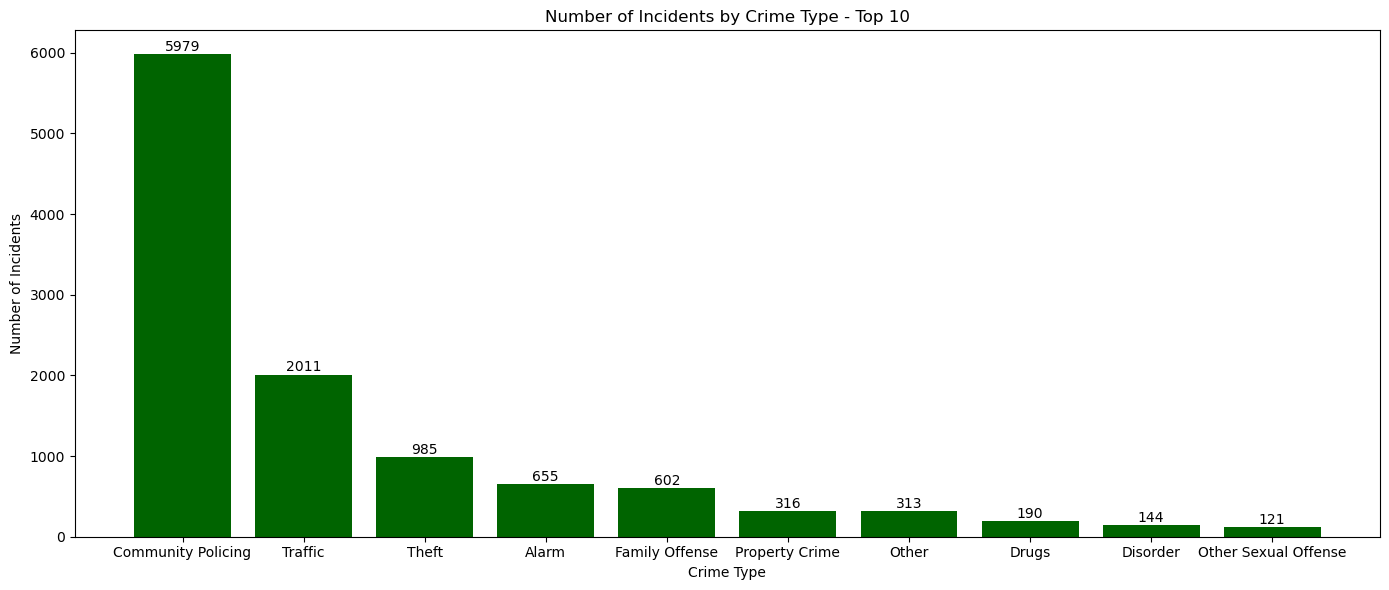

In [82]:
# plot total number of crimes by crime type in bar chart - top 10 most occuring incidents
plt.figure(figsize = (14, 6))
bars = plt.bar(crime_type_df['crime_type'], crime_type_df['count'], color = 'darkgreen')
plt.title('Number of Incidents by Crime Type - Top 10')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha = 'center', va = 'bottom', fontsize = 10)

plt.tight_layout()
crime_type_graph = plt.gcf()

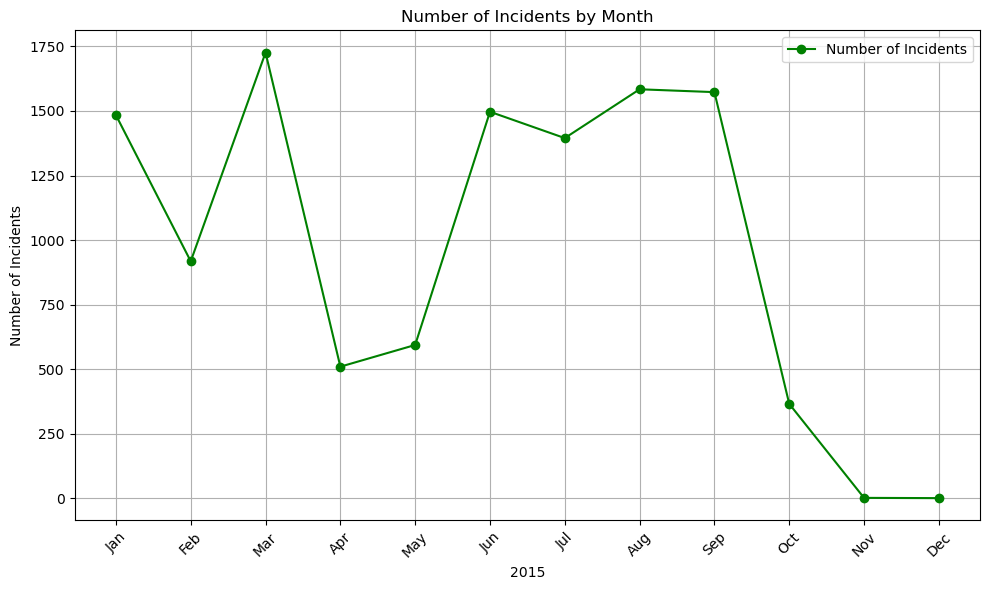

In [84]:
# plot total crimes by month
plt.figure(figsize=(10, 6))
plt.plot(month_count_df['month'], month_count_df['count'], marker='o', linestyle='-', color='g', label='Number of Incidents')
plt.title('Number of Incidents by Month')
plt.xlabel('2015')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
month_graph = plt.gcf()

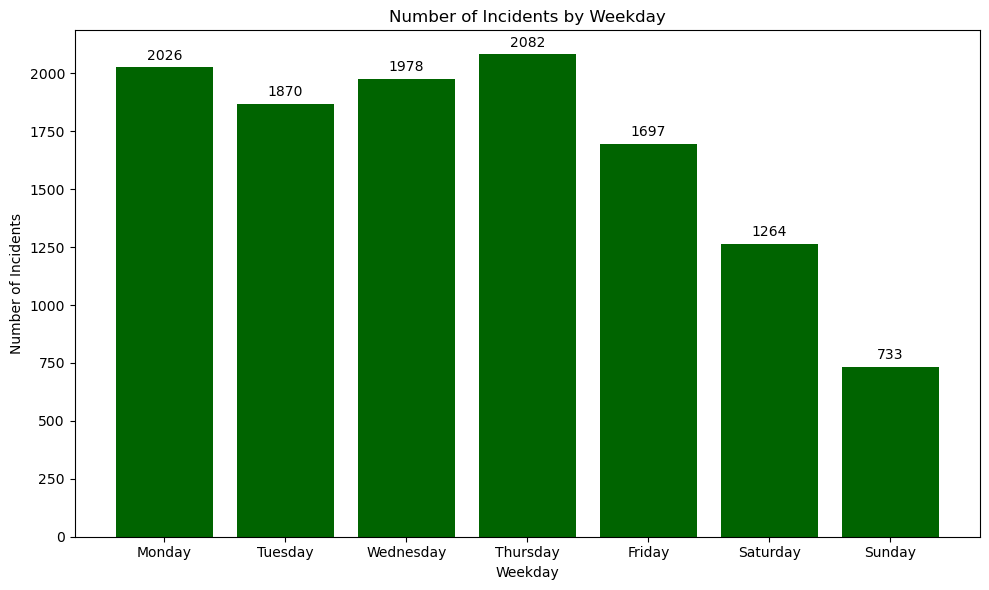

In [87]:
# Plot column chart for total incidents by weekday
# week_count_df_ordered = week_count_df.sort_values(by = 'count', ascending = False) - this is code for arranging bars in desc order
plt.figure(figsize=(10, 6))
bars = plt.bar(week_count_df['weekday'], week_count_df['count'], color='darkgreen')

plt.title('Number of Incidents by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Incidents')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, yval, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
week_graph = plt.gcf()

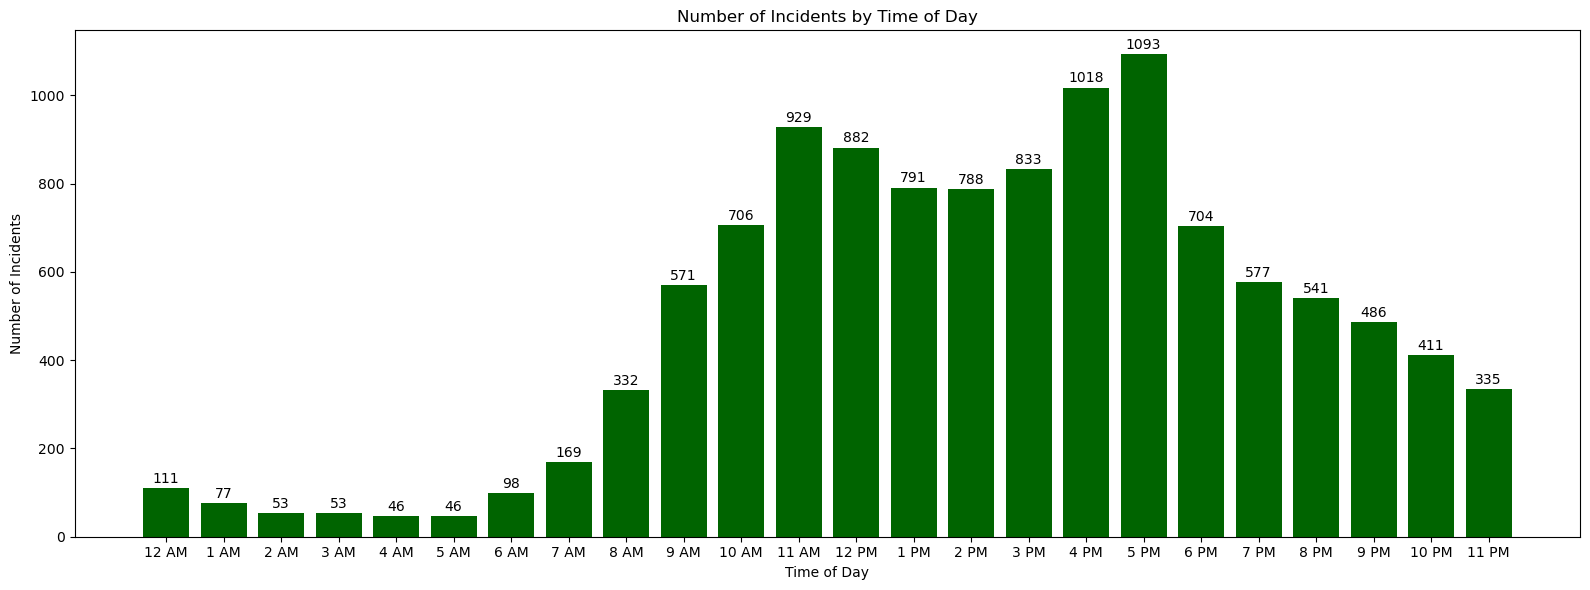

In [91]:
# Plot column chart for incidents by time of day
# td_count_df_ordered = td_count_df.sort_values(by = 'count', ascending = False) - code to sort bars in desc order
plt.figure(figsize=(16, 6))
bars = plt.bar(td_count_df['hour_of_day'], td_count_df['count'], color='darkgreen')
plt.title('Number of Incidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
hour_graph = plt.gcf()

In [92]:
## 4b) plot theft related incidents by weekday, time of day, and month

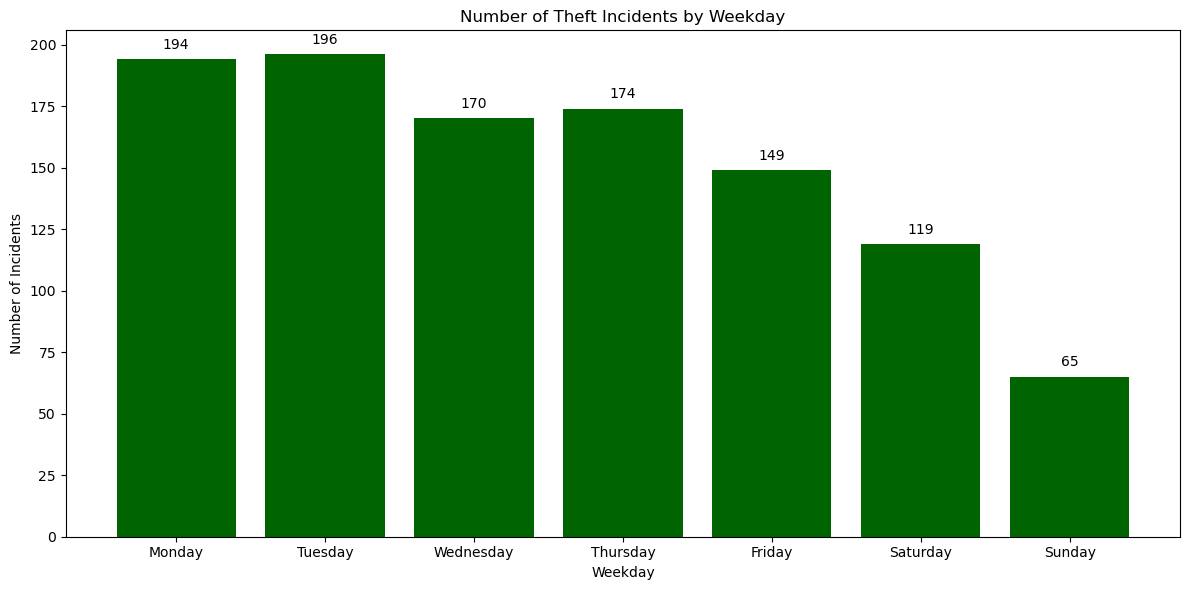

In [94]:
# plot column chart for theft incidents by weekday
# theft_by_weekday_df_ordered = theft_by_weekday_df.sort_values(by = 'count', ascending = False) - this is code for arranging bars in desc order
plt.figure(figsize = (12, 6))
bars = plt.bar(theft_by_weekday_df['weekday'], theft_by_weekday_df['count'], color = 'darkgreen')
plt.title('Number of Theft Incidents by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Incidents')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3, yval, ha = 'center', va = 'bottom', fontsize = 10)

plt.tight_layout()
theft_week_graph = plt.gcf()

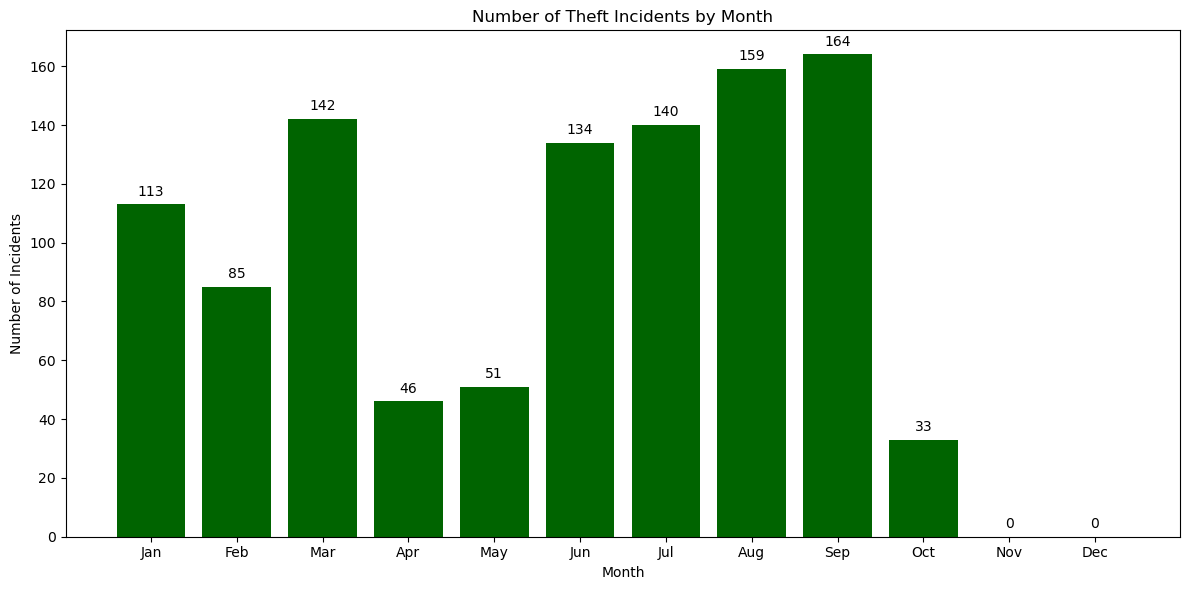

In [95]:
# plot the number of theft incidents by month in column chart
# theft_month_df_ordered = theft_by_month_df.sort_values(by = 'count', ascending = False) - this is code for arranging bars in desc order
plt.figure(figsize = (12, 6))
bars = plt.bar(theft_by_month_df['month'], theft_by_month_df['count'], color = 'darkgreen')
plt.title('Number of Theft Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, yval, ha = 'center', va = 'bottom')

plt.tight_layout()
theft_month_graph = plt.gcf()

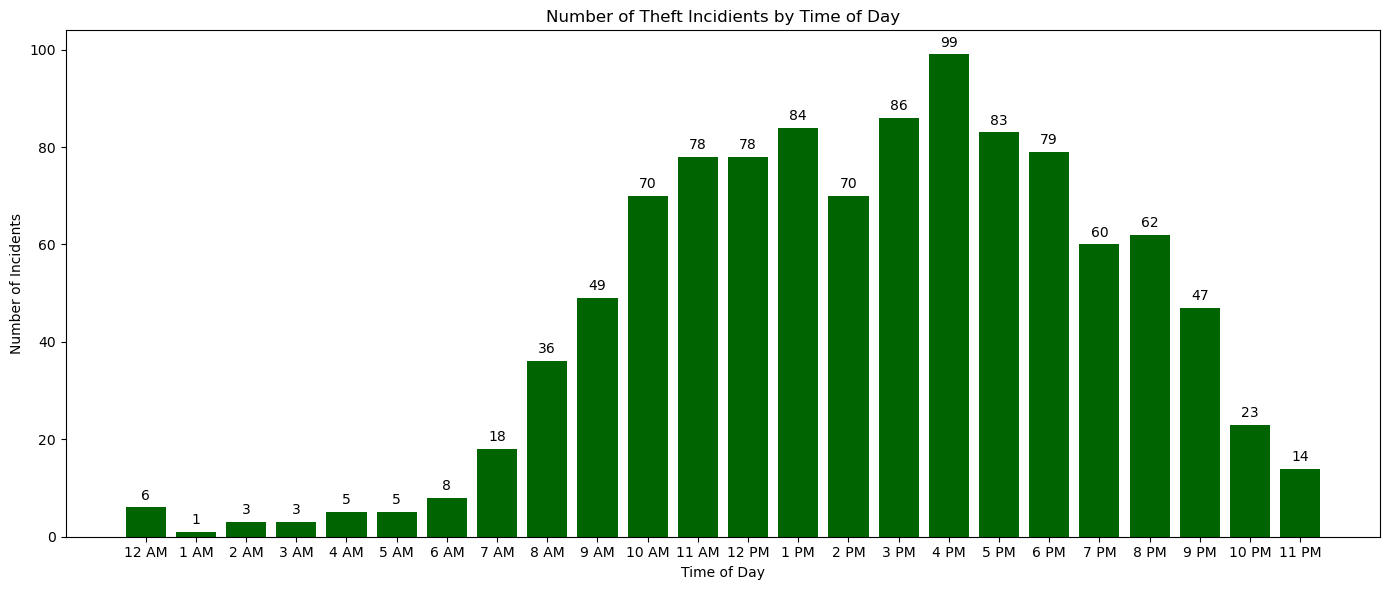

In [96]:
# plot the number of theft incidents by time of day in column chart
# theft_time_df_ordered = theft_by_time_df.sort_values(by = 'count', ascending = False) - this is code for arranging bars in desc order

plt.figure(figsize = (14, 6))
bars = plt.bar(theft_by_time_df['time of day'], theft_by_time_df['count'], color = 'darkgreen')
plt.title('Number of Theft Incidients by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha = 'center', va = 'bottom', fontsize = 10)

plt.tight_layout()
theft_hour_graph = plt.gcf()

In [97]:
## 4c) plot assault related incidents by weekday, time of day, and month

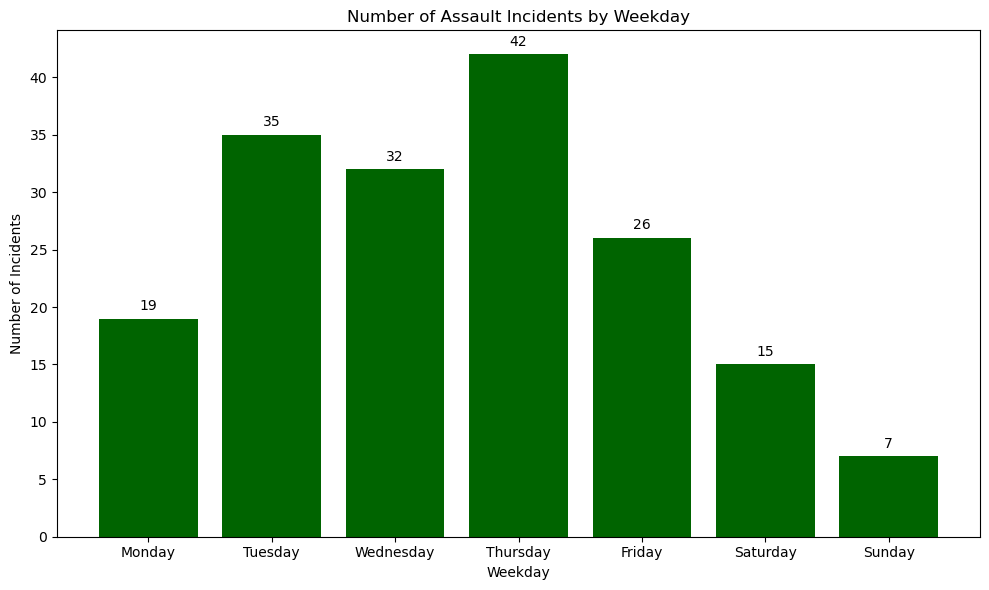

In [99]:
# plot assault incidents by weekday in bar chart
# assault_week_df_ordered = assault_weekday_df.sort_values(by = 'count', ascending = False) - to arrange bars in desc order
plt.figure(figsize = (10, 6))
bars = plt.bar(assault_weekday_df['weekday'], assault_weekday_df['count'], color = 'darkgreen')
plt.title('Number of Assault Incidents by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Incidents')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + .5, yval, ha = 'center', va = 'bottom', fontsize = 10)

plt.tight_layout()
assault_week_graph = plt.gcf()

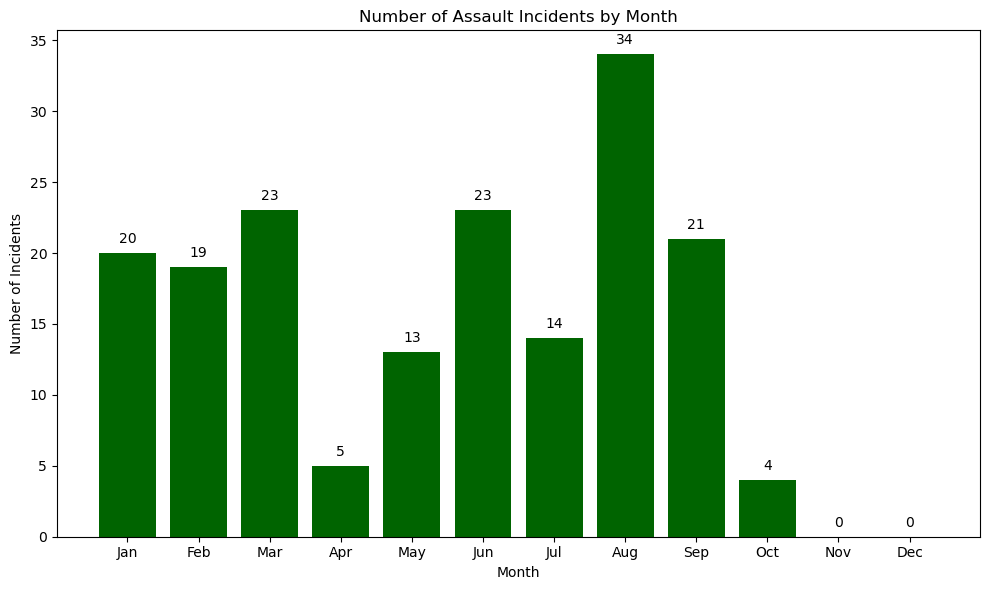

In [103]:
# plot the assault incidents by month in bar chart
# assault_month_df_ordered = assault_month_df.sort_values(by = 'count', ascending = False) - to show in desc order
plt.figure(figsize = (10, 6))
bars = plt.bar(assault_month_df['month'], assault_month_df['count'], color = 'darkgreen')
plt.title('Number of Assault Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + .5, yval, ha = 'center', va = 'bottom', fontsize = 10)

plt.tight_layout()
assault_month_graph = plt.gcf()

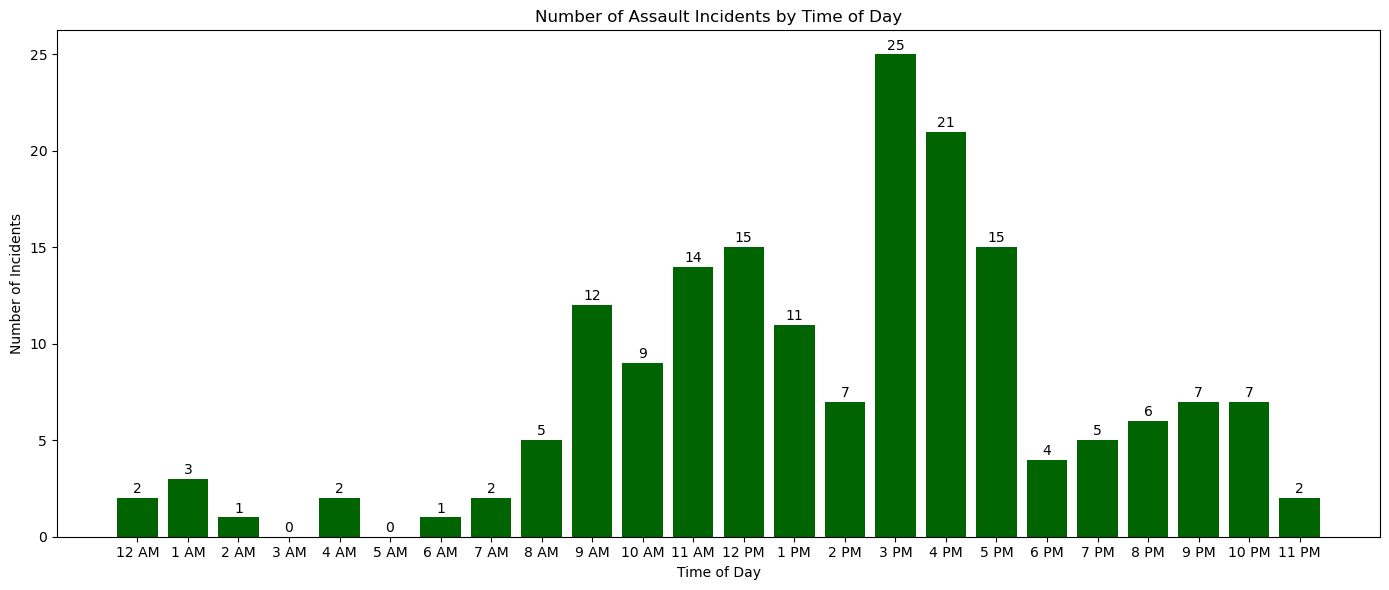

In [106]:
# plot the assault incidents by time of day in bar chart
# assault_hour_df_ordered = assault_hour_df.sort_values(by = 'count', ascending = False) - to arrange in desc order
plt.figure(figsize = (14, 6))
bars = plt.bar(assault_hour_df['hour_of_day'], assault_hour_df['count'], color = 'darkgreen')
plt.title('Number of Assault Incidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + .1, yval, ha = 'center', va = 'bottom', fontsize = 10)

plt.tight_layout()
assault_hour_graph = plt.gcf()